In [78]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import scipy.io
from scipy import signal
import scipy.stats as stats
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_theme()

import os
if not os.path.exists('figures'):
   os.makedirs('figures')
   print(' The folder ''figures'' is created')
else:
    print(' The folder ''figures'' already exists')

 The folder figures already exists


In [79]:

# %% Load the data from the five masts
data= scipy.io.loadmat('Data_for_excercise_v2.mat')

u = np.squeeze(np.array(data['u']))
v = np.squeeze(np.array(data['v']))
w = np.squeeze(np.array(data['w']))
time = np.squeeze(np.array(data['t']))

# Remove NaNs if necessary
indNaN = np.argwhere(~np.isnan(np.mean(u,1)))
indNaN = indNaN[:,0]
time = time[indNaN]
v = v[indNaN,:]
w = w[indNaN,:]
u = u[indNaN,:]

# Get the number of sensors and time step
Nsensors = u[0,:].size
N = u[:,0].size

In [80]:
#Question 1


First and second order turbulence characteristics.

Standard deviation of wind components. 
Turbulence intensity.
Friction velocity.
Velcity spectrum.


plus 'coherence' which is a normalization of turbulence. 




2 point velocity spectrum.

Any quantity of u prime, v prime, and w prime.

Velocity spectrum inflow and their response to vibrartuins,

Turbulence spectrum.





In [81]:
# %% Question 2
dt = time[1] - time[0] #sampling time s
fs = 1/dt #  Sampling frequency Hz
f_nyq = fs/2 # Nyquist frequency Hz
f_0 = 1/3277 #Lowest measureable frequency:

print(dt)
print(fs)
print(f_nyq)
print(f_0)

# print(time[-1])

0.2
5.0
2.5
0.0003051571559353067


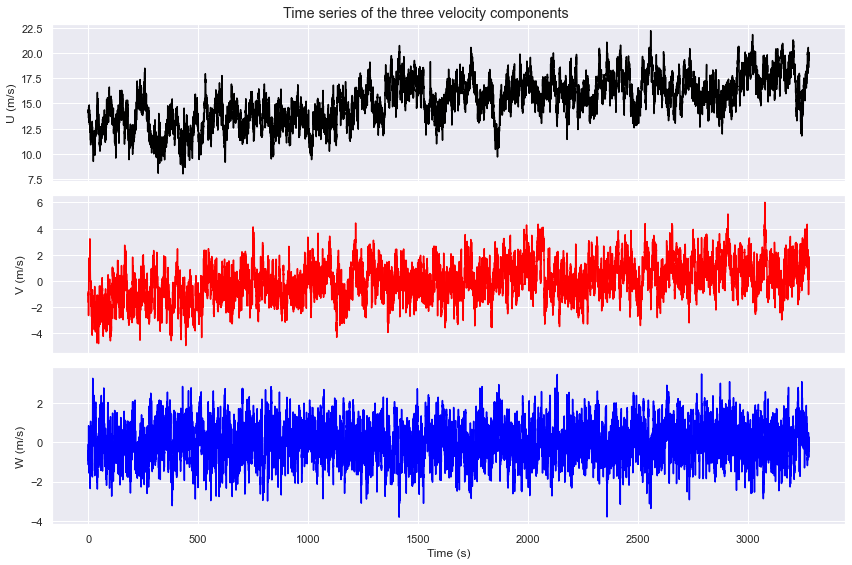

In [82]:
# %% Question 3
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)

# Plotter u-komponenten
ax[0].plot(time, u[:, 0], color = 'black')
ax[0].set_ylabel('U (m/s)')

# Plotter v-komponenten
ax[1].plot(time, v[:, 0], color='red')
ax[1].set_ylabel('V (m/s)')

# Plotter w-komponenten
ax[2].plot(time, w[:, 0], color='blue')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('W (m/s)')

fig.suptitle('Time series of the three velocity components')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.savefig('./figures/time_series_three_components.pdf', dpi = 200, transparent=False, bbox_inches='tight')

plt.show()




#Treshold of 40 percent error. Wavelet decomposition

#Sletter lineær trend kan vi studere turbulence. Kan ikke studere uten, får feil verdi. 
#Hvis vi ikke bruker detrend gir vi feil verdi til kunden. Det har med turbulens intensitet, hvis den blir feil eller for høy. 


#Ved å bruke detrend blir den stationary

In [83]:


#Conduct stationary test
# Sett opp bloker på 5 - 10minutter i tidsrekken
#treshhold vi tolerer i feil for mean og std.
#Nwin, bruk roud
# check_stationarity = stationaryTest(u, t = time, np.round(300*fs), 0.2, 0.4)
vel_component = [u, v, w]

# for component in vel_component:
num_masts=5
vel_names = ['u', 'v', 'w']
t = time
Nwin=round(300*fs)
thres1=0.2
thres2=0.40




for n in range(num_masts):

        mean = np.sqrt(u[:, n]**2 + v[:, n]**2 + w[:, n]**2)

        detrended_component = remove_linear_trend(u[:, n], preserve_mean = True)
        mean_detrended = np.mean(detrended_component)
        mean_og, SD, stationarity = stationaryTest(u[:, n], t, Nwin, thres1, thres2, mean)

        print('')
        print('original')
        print(mean_og)
        print(SD)
        print(stationarity)
       
        print('detrended')
        mean_de, SD, stationarity = stationaryTest(detrended_component, t, Nwin, thres1, thres2, mean_detrended)
        print(mean_de)
        print(SD)
        print(stationarity)


for component in vel_component:
        #mean_original = np.mean(u[:, n])
        # u1 = remove_linear_trend(u[:, 0], preserve_mean = True)
        # v1 = remove_linear_trend(v[:, 0], preserve_mean = True)
        # w1 = remove_linear_trend(w[:, 0], preserve_mean = True)
        # mean = np.sqrt(u1**2 + v1**2 + w1**2)
        mean = np.sqrt(u[:, 0]**2 + v[:, 0]**2 + w[:, 0]**2)

        detrended_component = remove_linear_trend(component[:, 0], preserve_mean = True)
        mean_detrended = np.mean(detrended_component)
        mean_og, SD, stationarity = stationaryTest(component[:, 0], t, Nwin, thres1, thres2, mean)
   

        print('')
        print('original')
        print(mean_og)
        print(SD)
        print(stationarity)
        print('')
        print('detrended')
        mean_de, SD, stationarity = stationaryTest(detrended_component, t, Nwin, thres1, thres2, mean_detrended)

        print(mean_de)
        print(SD)
        print(stationarity)

  
        


original
0.591585866194958
0.4609021775796248
1
detrended
0.09004034869173627
0.26750422842866617
0

original
0.6022984573267847
0.44828670219357725
1
detrended
0.08806794380515948
0.25783663404849055
0

original
0.6718238775720133
0.42835648369751045
1
detrended
0.08370207447314537
0.2213159222362202
0

original
0.7306721674338472
0.4558515087177124
1
detrended
0.08764169723075299
0.2675972815082237
0

original
0.5294107036184486
0.4244559045402462
1
detrended
0.08682224634812319
0.23458240152485144
0

original
0.591585866194958
0.4609021775796248
1

detrended
0.09004034869173627
0.26750422842866617
0

original
1.161779506528521
0.27699872140175363
1

detrended
1.986270031064326e+16
0.1851149380068019
1

original
1.0221261464502331
0.10729321606823894
1

detrended
3.117996640349737e+16
0.1080312226410236
1


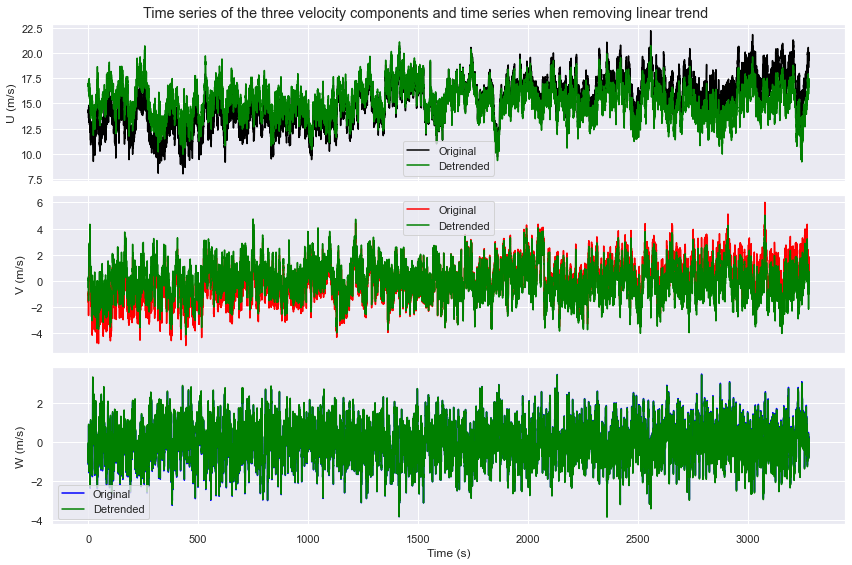

In [84]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)


# Plotter u-komponenten
ax[0].plot(time, u[:, 0], color = 'black', label = 'Original')
ax[0].plot(time, remove_linear_trend(u[:, 0], preserve_mean = True), color = 'green', label = 'Detrended')
ax[0].legend()
ax[0].set_ylabel('U (m/s)')

# Plotter v-komponenten
ax[1].plot(time, v[:, 0], color='red', label = 'Original')
ax[1].plot(time, remove_linear_trend(v[:, 0], preserve_mean = True), color = 'green', label = 'Detrended')
ax[1].legend()
# ax[1].plot(time, u1[:, 0], color = 'red')
ax[1].set_ylabel('V (m/s)')

# Plotter w-komponenten
ax[2].plot(time, w[:, 0], color='blue', label = 'Original')
ax[2].plot(time, remove_linear_trend(w[:, 0], preserve_mean = True), color = 'green', label = 'Detrended')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('W (m/s)')
ax[2].legend()


fig.suptitle('Time series of the three velocity components and time series when removing linear trend')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.savefig('./figures/linear_trend.pdf', dpi = 200, transparent=False, bbox_inches='tight')


plt.show()

In [85]:
# %% Question 4
skewness_u = []
skewness_v = []
skewness_w = []

kurtosis_u = []
kurtosis_v = []
kurtosis_w = []
def skew_kurt(u, v, w):
    skewness_u.append(stats.skew(u))
    skewness_v.append(stats.skew(v))
    skewness_w.append(stats.skew(w))


    kurtosis_u.append(stats.kurtosis(u))
    kurtosis_v.append(stats.kurtosis(v))
    kurtosis_w.append(stats.kurtosis(w))

    return skewness_u, skewness_v, skewness_w, kurtosis_u, kurtosis_v, kurtosis_w





for n in range(num_masts):
    u2 = remove_linear_trend(u[:, n], preserve_mean = True)
    v2 = remove_linear_trend(v[:, n], preserve_mean = True)
    w2 = remove_linear_trend(w[:, n], preserve_mean = True)

    skewness_kurtosis = skew_kurt(u2, v2, w2)

print('skewness')
print(skewness_u)
print(skewness_v)
print(skewness_w)
print('')
print(np.mean(skewness_u))
print(np.mean(skewness_v))
print(np.mean(skewness_w))
print('')

print('kurtosis')
print(kurtosis_u)
print(kurtosis_v)
print(kurtosis_w)
print('')
print(np.mean(kurtosis_u))
print(np.mean(kurtosis_v))
print(np.mean(kurtosis_w))





skewness
[-0.014061094812800407, -0.05663675587924561, -0.06239095538267015, -0.06111683578753586, -0.091996394134379]
[0.06705063943135424, 0.03243602779887319, 0.033463534110603314, -0.04267638612429889, -0.0719932290592841]
[-0.014330119771796181, 0.053200001215005864, 0.034146356681361775, -0.06917147369926957, -0.038536257014636144]

-0.0572404071993262
0.0036561172314495518
-0.006938298517866851

kurtosis
[-0.032962223321107764, 0.09081622266148859, 0.14185416076275592, 0.12457985935454108, -0.058635698438548545]
[-0.014375859441354333, 0.006294389343385998, 0.11922807752805253, 0.08892492737562518, -0.09020274129031369]
[0.0061383693548768825, 0.11365101817233203, -0.03814994201529842, -0.10520590739923374, -0.08192060712896065]

0.053130464203825854
0.02197375870307914
-0.021097413803256783


In [86]:
# %% Question 5
# mean = np.sqrt(np.mean(u)**2 + np.mean(v)**2 + np.mean(w)**2)

def wave_charachreisitcs(u, v, w):
    mean = np.sqrt(np.mean(u)**2 + np.mean(v)**2 + np.mean(w)**2)

    
    sigma_u = np.std(u, axis = 0)
    sigma_v = np.std(v, axis = 0)
    sigma_w = np.std(w, axis = 0)

    # turbulence_intecity = (np.sqrt(1/3 * (sigma_u**2 + sigma_v**2 + sigma_w**2)))/mean * 100

    turbulence_u = sigma_u/mean * 100
    turbulence_v = sigma_v/mean * 100
    turbulence_w = sigma_w/mean * 100
    
    skew_u = stats.skew(u)
    skew_v = stats.skew(v)
    skew_w = stats.skew(w)

    kurt_u = stats.kurtosis(u)
    kurt_v = stats.kurtosis(v)
    kurt_w = stats.kurtosis(w)


    return mean, turbulence_u, turbulence_v, turbulence_w, skew_u, skew_v, skew_w, kurt_u, kurt_v, kurt_w






for n in range(num_masts):
    u2 = remove_linear_trend(u[:, n], preserve_mean = True)
    v2 = remove_linear_trend(v[:, n], preserve_mean = True)
    w2 = remove_linear_trend(w[:, n], preserve_mean = True)

    charachteristics = wave_charachreisitcs(u2, v2, w2)
    print('Mean wind speed')
    print(charachteristics[0])
    print('Turbulence inteisty u')
    print(charachteristics[1])
    print('')

    

Mean wind speed
15.201804919084164
Turbulence inteisty u
10.892666507021719

Mean wind speed
15.201804919084164
Turbulence inteisty u
10.97755872528027

Mean wind speed
15.201804919084164
Turbulence inteisty u
10.876014821528052

Mean wind speed
15.201804919084164
Turbulence inteisty u
10.8411652111803

Mean wind speed
15.201804919084163
Turbulence inteisty u
10.82665211445666



In [87]:
# %% Question 6

for n in range(num_masts):
    u3 = u[:, n]
    v3 = v[:, n]
    w3 = w[:, n]
    
    friction_vleocity = frictionVelocity(u3, v3, w3)
    print('')
    print(friction_vleocity[0])
    print(friction_vleocity[1])


    #The diagonal says something about turbulence intesicty


0.8148794604185674
[[ 2.74194491 -0.09973131 -0.66349144]
 [-0.09973131  1.61357233  0.02670226]
 [-0.66349144  0.02670226  0.89992487]]

0.7969962860807522
[[ 2.78485026 -0.04281816 -0.63509485]
 [-0.04281816  1.65000356  0.0117255 ]
 [-0.63509485  0.0117255   0.8891452 ]]

0.7904645597710374
[[ 2.73356806 -0.0434862  -0.6248046 ]
 [-0.0434862   1.63882935  0.00608388]
 [-0.6248046   0.00608388  0.88354823]]

0.7909655262457936
[[ 2.71607799 -0.00614737 -0.62552002]
 [-0.00614737  1.64183245 -0.01154015]
 [-0.62552002 -0.01154015  0.89556183]]

0.7980920383460615
[[ 2.70881081  0.01199333 -0.6368222 ]
 [ 0.01199333  1.62730446  0.01280385]
 [-0.6368222   0.01280385  0.87880711]]


c:\Users\audun\OneDrive\Dokumenter\GEOF105\Python\envs\GEOF232\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


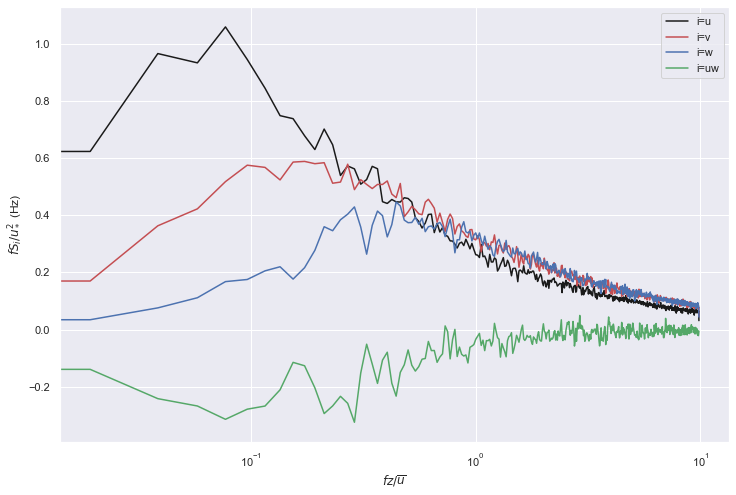

In [88]:
# %% Question 7

#psd til u ved vwelch, får spectra og  del på friction velocity
#Kjøre velch deler specra fra welc på firkshjonsvelocity
#Deler verdien når vi delte spectra på frksjonshastighet på y aksen 
#Bruke semilogx(freq, spectra/fric_vel**2) plott

from scipy.signal import welch
fig, ax = plt.subplots(1, ncols=1, figsize=(12, 8), sharex=True)

# for n in range(num_masts):

u4 = remove_linear_trend(u[:, 0], preserve_mean = True)
v4 = remove_linear_trend(v[:, 0], preserve_mean = True)
w4 = remove_linear_trend(w[:, 0], preserve_mean = True)
mean = np.sqrt(np.mean(u4)**2 + np.mean(v4)**2 + np.mean(w4)**2)
u3 = u[:, 0]
v3 = v[:, 0]
w3 = w[:, 0]
    
friction_vleocity = frictionVelocity(u3, v3, w3)

#Parameters for PSD and CPSD

nperseg = round(N / 16)
noverlap = round(nperseg / 2)



#Compute the PSD
f_u, S_u = signal.welch(u4, fs, nperseg=nperseg, noverlap=noverlap)
f_v, S_v = signal.welch(v4, fs, nperseg=nperseg, noverlap=noverlap)
f_w, S_w = signal.welch(w4, fs, nperseg=nperseg, noverlap=noverlap)

    #Compute the cross between u and w
f_uw, S_uw = signal.csd(u4, w4, fs, nperseg=nperseg, noverlap=noverlap)

    # plt.figure(figsize=(14, 10))
    # plt.subplot(2, 2, 1)

    # Kryss-PSD gir komplekse verdier, så ta den reelle delen for fRe(Suw)
    # Re_Psuw = np.real(Psuw)

    # Normaliser PSDene
fSu_u2_star = f_u * S_u / friction_vleocity[0]**2
fSv_u2_star = f_v * S_v / friction_vleocity[0]**2
fSw_u2_star = f_w * S_w / friction_vleocity[0]**2
fRe_Suw_u2_star = f_uw * S_uw  / friction_vleocity[0]**2


z=60
fr = (f_u * z) / mean

plt.semilogx(fr, fSu_u2_star, 'k', label="i=u")
plt.semilogx(fr, fSv_u2_star, 'r', label="i=v")
plt.semilogx(fr, fSw_u2_star, 'b', label="i=w")
plt.semilogx(fr, fRe_Suw_u2_star, 'g', label="i=uw")

plt.xlabel("$f z / \overline{u}$")
plt.ylabel("$f S_i/u^2_* $ (Hz)")
plt.legend()
fig.savefig('./figures/welch.pdf', dpi = 200, transparent=False, bbox_inches='tight')


plt.show()
        
#vil være like side homogen


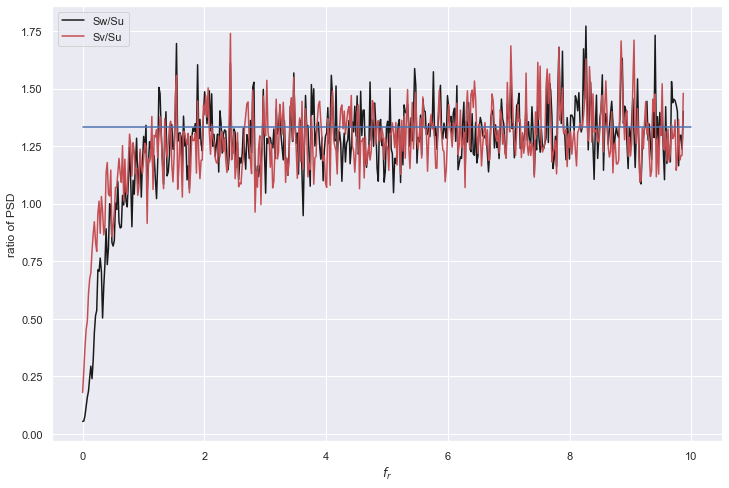

In [89]:
#Question 8

fig, ax = plt.subplots(1, ncols=1, figsize=(12, 8), sharex=True)

# Calculate the ratios
Sw_Su = S_w / S_u
Sv_Su = S_v / S_u

plt.plot(fr, Sw_Su, 'k', label="Sw/Su")
plt.plot(fr, Sv_Su, 'r', label="Sv/Su")
plt.plot((0, 10), (4/3, 4/3), 'b')
plt.xlabel("$f_r$")
plt.ylabel("ratio of PSD")
plt.legend()
plt.xlim()
fig.savefig('./figures/ratio.pdf', dpi = 200, transparent=False, bbox_inches='tight')

# plt.show()
#Siden de kovergere rund 4/3 tyder det på god kvalitet